<a href="https://colab.research.google.com/github/Sushmithaa-Pandian/Machine_learning_sush/blob/main/multi_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [19]:
train_dataset_path = '/content/train'
test_dataset_path ='/content/test'

In [20]:
IMG_WIDTH = 150
IMG_HEIGHT = 150


In [21]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),

                                                   class_mode='categorical',
                                                   shuffle=True)

Found 21 images belonging to 3 classes.


In [22]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(test_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),

                                                             class_mode='categorical',
                                                             shuffle=False)

Found 9 images belonging to 3 classes.


In [23]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Yellow
1 : red
2 : white


In [24]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras import optimizers
cnn_model=Sequential ()
cnn_model.add (Conv2D (input_shape= (150, 150, 3), filters=20, kernel_size=4,strides=2, padding='valid', activation='relu', data_format='channels_last'))
cnn_model.add (Conv2D (filters=15, kernel_size=3, strides=1, padding='valid', activation='relu', data_format='channels_last'))
cnn_model.add (MaxPooling2D (pool_size=2, data_format='channels_last'))
cnn_model.add (Flatten () )
cnn_model.add (Dropout (0.2))
cnn_model.add (Dense (3, activation='softmax'))
cnn_model.compile (optimizer=optimizers.Adam (lr=0.0001),loss='binary_crossentropy', metrics= ['accuracy'])
cnn_model.summary ()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 74, 74, 20)        980       
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 15)        2715      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 15)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 19440)             0         
                                                                 
 dropout_1 (Dropout)         (None, 19440)             0         
                                                                 
 dense_1 (Dense)             (None, 3)                 58323     
                                                      

In [25]:
optimizer = Adam(learning_rate=0.001)

In [10]:
from keras.backend import categorical_crossentropy
cnn_model.compile(optimizer, loss="categorical_crossentropy", metrics=['accuracy'])

In [27]:
cnn_model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6835 - accuracy: 0.2857 - val_loss: 0.6597 - val_accuracy: 0.4444
Epoch 2/10
1/1 [==============================] - 1s 611ms/step - loss: 0.6552 - accuracy: 0.3810 - val_loss: 0.6425 - val_accuracy: 0.4444
Epoch 3/10
1/1 [==============================] - 1s 615ms/step - loss: 0.6499 - accuracy: 0.3810 - val_loss: 0.6277 - val_accuracy: 0.4444
Epoch 4/10
1/1 [==============================] - 1s 597ms/step - loss: 0.6248 - accuracy: 0.5714 - val_loss: 0.6148 - val_accuracy: 0.5556
Epoch 5/10
1/1 [==============================] - 1s 588ms/step - loss: 0.6189 - accuracy: 0.4286 - val_loss: 0.6037 - val_accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 1s 565ms/step - loss: 0.6080 - accuracy: 0.4762 - val_loss: 0.5938 - val_accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 1s 955ms/step - loss: 0.5941 - accuracy: 0.5238 - val_loss: 0.5848 - val_accuracy: 0.5556
Epoch 8/10
1/1 [=======

In [28]:
predictions = cnn_model.predict(test_generator)

1/1 [==============================] - 0s 155ms/step


In [30]:
test_loss, test_accuracy = cnn_model.evaluate(test_generator)

1/1 [==============================] - 0s 102ms/step - loss: 0.5571 - accuracy: 0.6667


In [32]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

In [33]:
cf_mtx = confusion_matrix(y_true, y_pred)

In [34]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

      Yellow       0.75      1.00      0.86         3
         red       0.00      0.00      0.00         3
       white       0.60      1.00      0.75         3

    accuracy                           0.67         9
   macro avg       0.45      0.67      0.54         9
weighted avg       0.45      0.67      0.54         9



In [35]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.5571280121803284
Test Accuracy: 0.6666666865348816


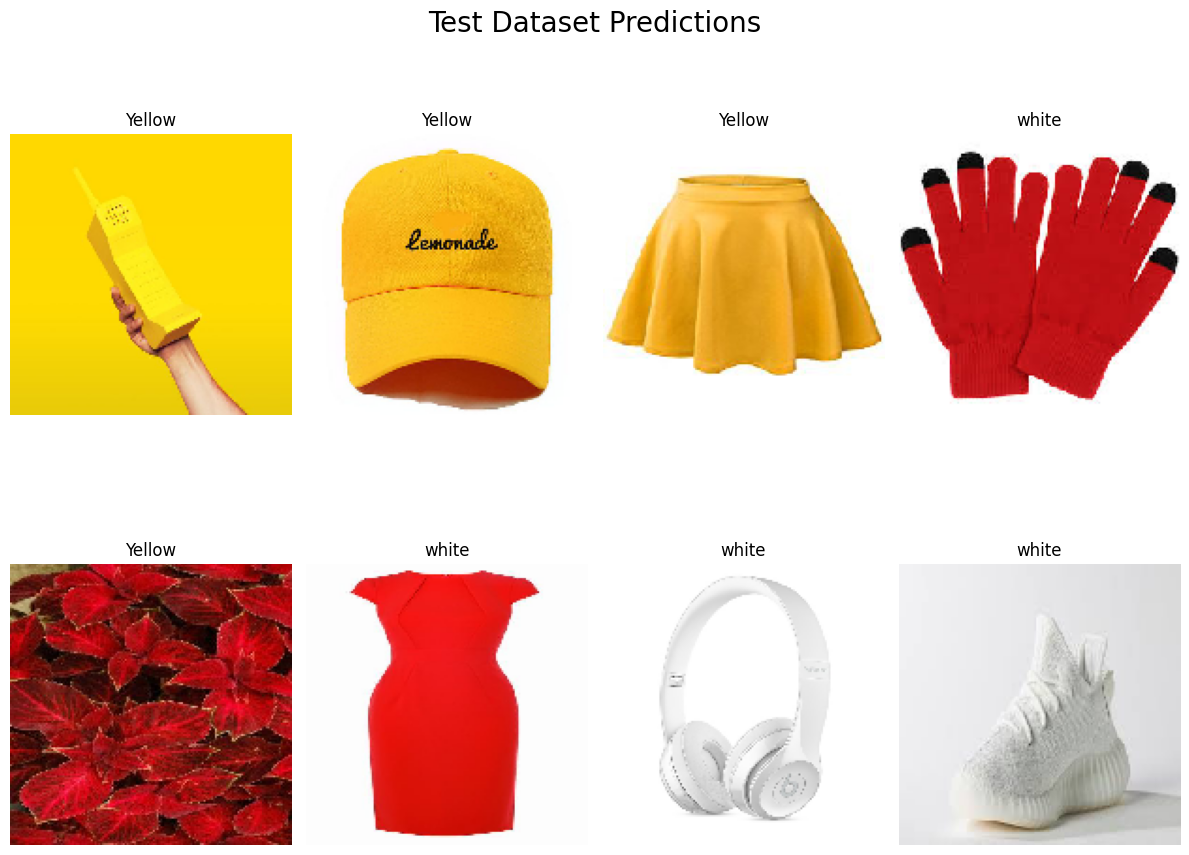

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(4):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()